<a href="https://colab.research.google.com/github/quyunniii/JSC270_Assg2/blob/new_branch/JSC270_A2_YunniQu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Libraries you'll likely need

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import DescrStatsW

###Importing data

In [5]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

In [6]:
## get column names and datatypes
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
## find missing values
income94.workclass.value_counts()

## replace missing values ' ?' with np.nan
income94 = income94.replace(' ?', np.nan)
income94.info()

## count the number of missing values in each column
income94.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           30725 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          30718 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      31978 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64

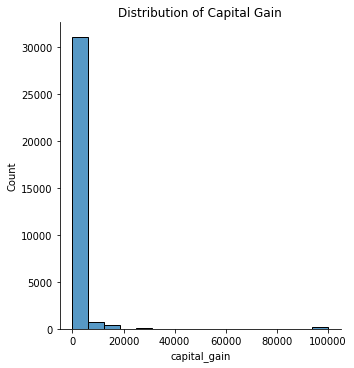

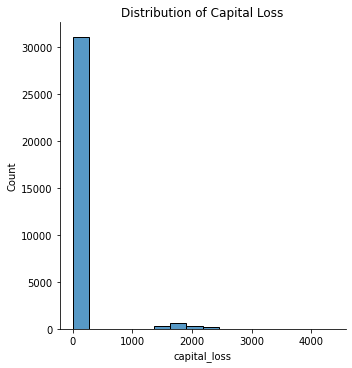

In [8]:
## distribution plot or capital_gain
capital_gain = sns.displot(income94,
            x = 'capital_gain')
capital_gain.set(title = 'Distribution of Capital Gain')

## distribution plot or capital_gain
capital_loss = sns.displot(income94,
            x = 'capital_loss')
capital_loss.set(title = 'Distribution of Capital Loss')
plt.show()

In [9]:
## add a categorical column for capital_gain
income94['capital_gain_cat'] = pd.cut(income94.capital_gain, range(0, 130000, 15000), right=False)

## add a categorical column for capital_loss
income94['capital_loss_cat'] = pd.cut(income94.capital_loss, range(0, 4000, 1000), right=False)

income94.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group,capital_gain_cat,capital_loss_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"[0, 15000)","[0, 1000)"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"[0, 15000)","[0, 1000)"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"[0, 15000)","[0, 1000)"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"[0, 15000)","[0, 1000)"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"[0, 15000)","[0, 1000)"


In [10]:
## summary table of capital_gain_cat
income94.groupby('capital_gain_cat')['capital_gain_cat'].count()

capital_gain_cat
[0, 15000)          31948
[15000, 30000)        447
[30000, 45000)          7
[45000, 60000)          0
[60000, 75000)          0
[75000, 90000)          0
[90000, 105000)       159
[105000, 120000)        0
Name: capital_gain_cat, dtype: int64

In [11]:
## summary table of capital_loss_cat
income94.groupby('capital_loss_cat')['capital_loss_cat'].count()

capital_loss_cat
[0, 1000)       31078
[1000, 2000)     1158
[2000, 3000)      314
Name: capital_loss_cat, dtype: int64

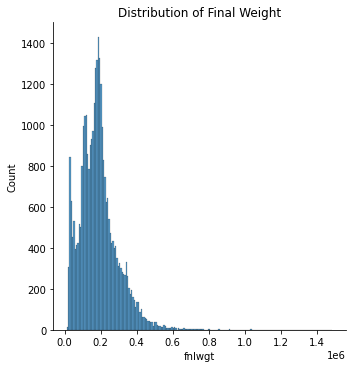

In [12]:
## plot distribution for final weight
fnlwgt = sns.displot(income94,
            x = 'fnlwgt')
fnlwgt.set(title = 'Distribution of Final Weight')


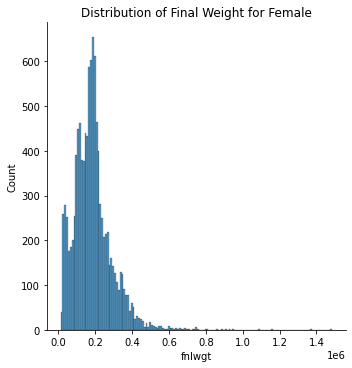

count    1.077100e+04
mean     1.857463e+05
std      1.029861e+05
min      1.228500e+04
25%      1.173630e+05
50%      1.760770e+05
75%      2.283315e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [13]:
## plot distribution for final weight of women
female_fnlwgt = income94[income94.sex == ' Female']
female_fnlwgt_plt = sns.displot(female_fnlwgt,
            x = 'fnlwgt')
female_fnlwgt_plt.set(title = 'Distribution of Final Weight for Female')
plt.show()

female_fnlwgt.fnlwgt.median()
female_fnlwgt.fnlwgt.describe()



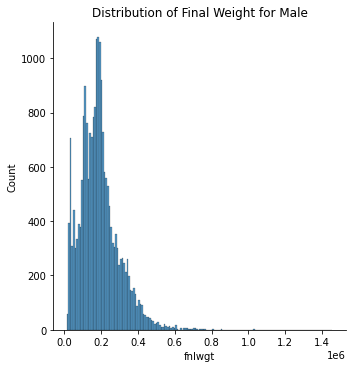

count    2.179000e+04
mean     1.917714e+05
std      1.067407e+05
min      1.376900e+04
25%      1.182008e+05
50%      1.801400e+05
75%      2.411462e+05
max      1.455435e+06
Name: fnlwgt, dtype: float64

In [14]:
## plot distribution for final weight of men
male_fnlwgt = income94[income94.sex == ' Male']
male_fnlwgt_plt = sns.displot(male_fnlwgt,
            x = 'fnlwgt')
male_fnlwgt_plt.set(title = 'Distribution of Final Weight for Male')
plt.show()

male_fnlwgt.fnlwgt.median()
male_fnlwgt.fnlwgt.describe()

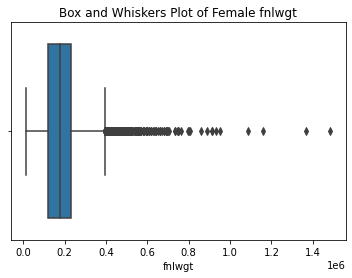

In [15]:
## Boxplot for final weight of women
female_fnlwgt_bplt = sns.boxplot(x = 'fnlwgt', data = female_fnlwgt)
female_fnlwgt_bplt.set(title = 'Box and Whiskers Plot of Female fnlwgt')
plt.show()

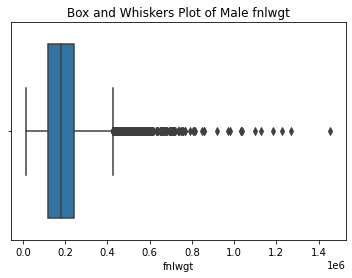

In [16]:
## Boxplot for final weight of men
male_fnlwgt_bplt = sns.boxplot(x = 'fnlwgt', data = male_fnlwgt)
male_fnlwgt_bplt.set(title = 'Box and Whiskers Plot of Male fnlwgt')
plt.show()

In [17]:
def get_outliers(num_var, df):
  '''Get outliers based on whiskers from 
  boxplot.
  Input - num_var: A string representing the v
  variable of interest
  df: The pd df containing the numerical data
  Output: A pd df containing the outlier obs
  '''
  # Capture 1st and 3rd quartiles
  firstquart = df[num_var].quantile(q=0.25)
  thirdquart = df[num_var].quantile(q=0.75)
  # Generate IQR
  iqr = thirdquart - firstquart
  # Generate Whiskers
  lower_whisker = firstquart - 1.5*iqr
  upper_whisker = thirdquart + 1.5*iqr
  # Gen outlier df
  outliers = df[(df[num_var] > upper_whisker) | (df[num_var] < lower_whisker)]
  return outliers

## get the number of outliers for women and men fnlwgt
print('The variable fnlwgt has {} outliers in female_fnlwgt dataset'.format(
    get_outliers('fnlwgt', female_fnlwgt)['fnlwgt'].count()))

print('The variable fnlwgt has {} outliers in male_fnlwgt dataset'.format(
    get_outliers('fnlwgt', male_fnlwgt)['fnlwgt'].count()))

The variable fnlwgt has 378 outliers in female_fnlwgt dataset
The variable fnlwgt has 617 outliers in male_fnlwgt dataset


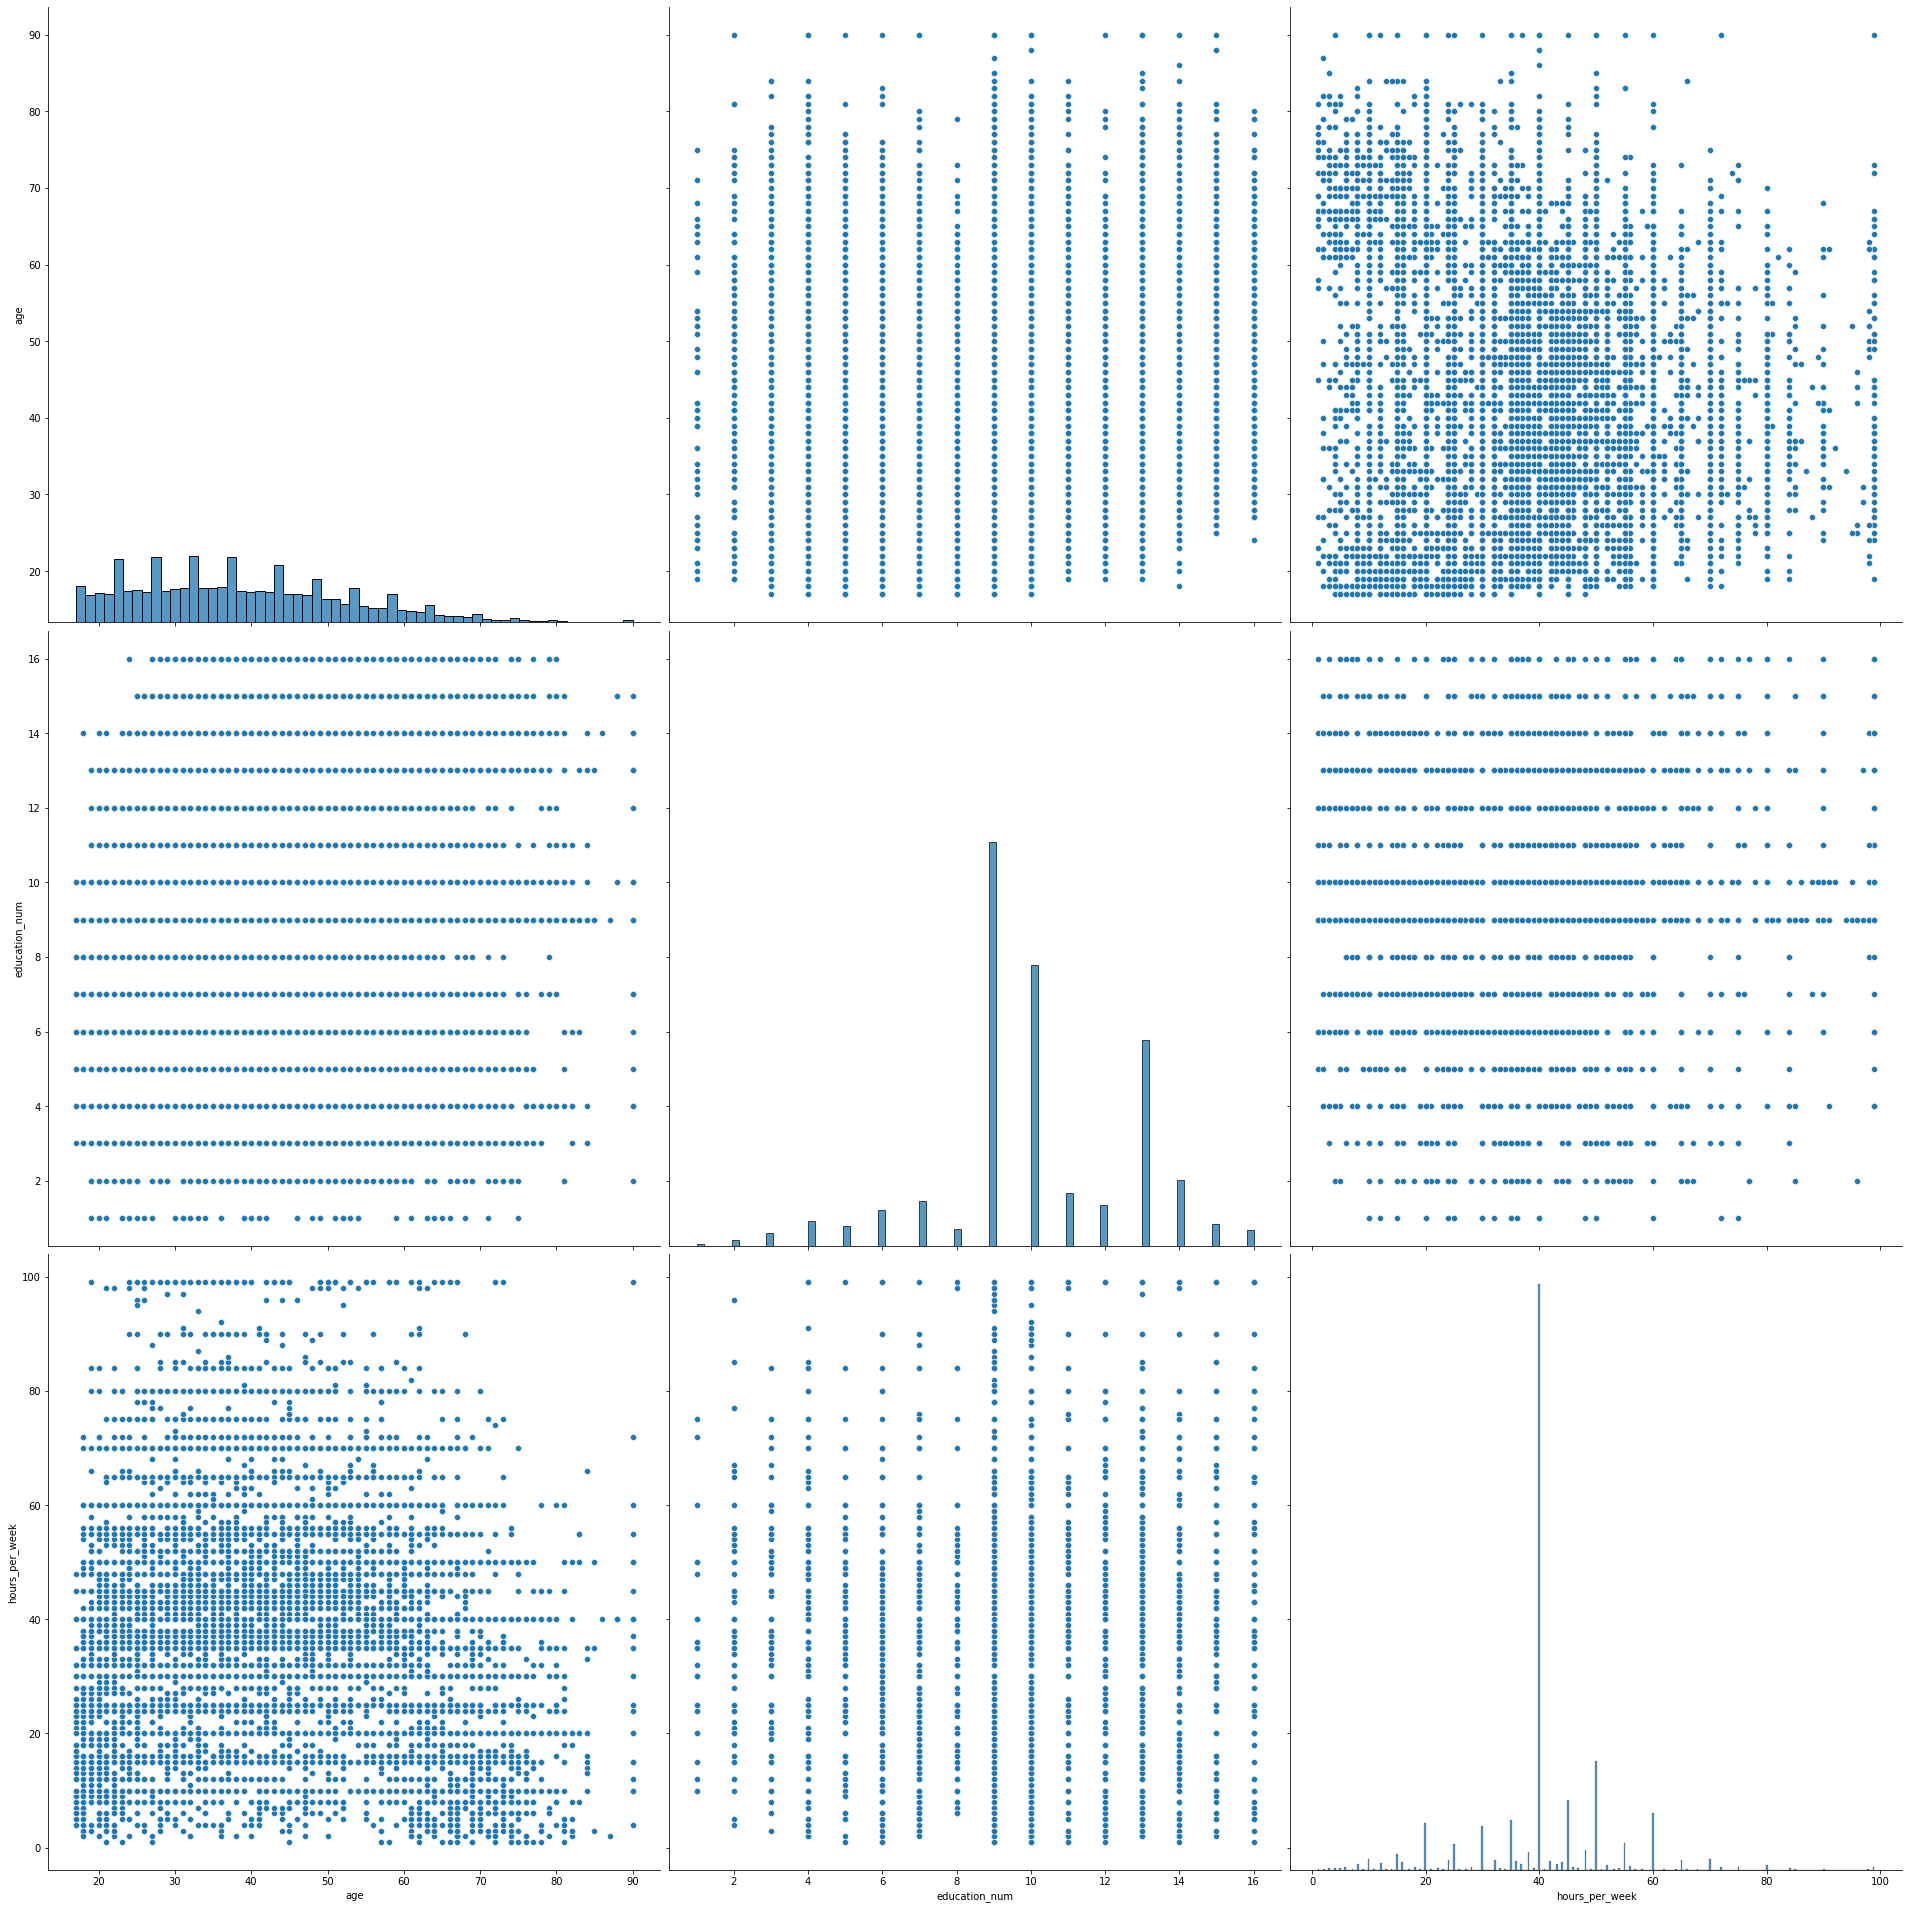

In [18]:
## plot correlation between age education_num and hours_per_week
corr_data = income94[['age', 'education_num', 'hours_per_week']]
sns.pairplot(corr_data,
             height=9)
plt.show()

In [19]:
## correlation coefficient
corr_data.corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


In [20]:
## correlation test on education_num and hours_per_week
stats.pearsonr(income94.education_num, income94.hours_per_week)

(0.1481227326229122, 4.2366474790836004e-159)

In [21]:
corr_age_edu = income94[['age', 'education_num', 'sex']]
corr_age_edu_f = corr_age_edu[corr_age_edu.sex == ' Female'][['age', 'education_num']]
corr_age_edu_m = corr_age_edu[corr_age_edu.sex == ' Male'][['age', 'education_num']]

In [22]:
## age and education_num correlation for women
corr_age_edu_f.corr()

,age,education_num
age,1.000000,-0.017899
education_num,-0.017899,1.000000


In [23]:
## correlation test on education_num and hours_per_week for female
stats.pearsonr(corr_age_edu_f.education_num, corr_age_edu_f.age)

(-0.017899243935447704, 0.06322895030804963)

In [24]:
## age and education_num correlation for men
corr_age_edu_m.corr()

,age,education_num
age,1.000000,0.060486
education_num,0.060486,1.000000


In [25]:
## correlation test on education_num and hours_per_week for male
stats.pearsonr(corr_age_edu_m.education_num, corr_age_edu_m.age)

(0.060486409198268254, 4.0229868301718123e-19)

In [26]:
## variance of education_num
np.var(income94['education_num'])

6.618686630416274

In [27]:
## variance of hours_per_week
np.var(income94['hours_per_week'])

152.45431279266475

In [43]:
## weighted variance of education_num
wgtedstats1 = DescrStatsW(income94['education_num'], weights = income94['fnlwgt'])
wgtedstats1.var

10.018874787555482

In [45]:
## weighted variance of hours_per_week
wgtedstats2 = DescrStatsW(income94['hours_per_week'], weights = income94['fnlwgt'])
wgtedstats2.var

146.33063300284684

In [41]:
## mean of education_num
np.mean(income94['education_num'])

10.0806793403151

In [42]:
## mean of hours_per_week
np.mean(income94['hours_per_week'])

40.437455852092995

In [44]:
## weighted mean of education_num
wgtedstats1.mean

10.018874787555482

In [46]:
## weighted mean of hours_per_week
wgtedstats2.mean

40.308570376806905

In [47]:
np.cov(income94['education_num'], income94['hours_per_week'])

array([[  6.61888991,   4.70533794],
       [  4.70533794, 152.45899505]])

In [49]:
income94.sort_values('fnlwgt')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income_group,capital_gain_cat,capital_loss_cat
17096,25,NaN,12285,Some-college,10,Never-married,NaN,Not-in-family,Amer-Indian-Eskimo,Female,0,0,20,United-States,<=50K,"[0, 15000)","[0, 1000)"
27207,23,Private,13769,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,30,United-States,<=50K,"[0, 15000)","[0, 1000)"
25743,46,Local-gov,14878,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,>50K,"[0, 15000)","[0, 1000)"
24012,26,Private,18827,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K,"[0, 15000)","[0, 1000)"
10826,25,Private,19214,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"[0, 15000)","[0, 1000)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,35,Private,1226583,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,52,United-States,>50K,"[0, 15000)","[0, 1000)"
15569,29,Private,1268339,HS-grad,9,Married-spouse-absent,Tech-support,Own-child,Black,Male,0,0,40,United-States,<=50K,"[0, 15000)","[0, 1000)"
16739,45,Private,1366120,Assoc-voc,11,Divorced,Other-service,Not-in-family,White,Female,0,0,8,United-States,<=50K,"[0, 15000)","[0, 1000)"
18138,39,Private,1455435,Assoc-acdm,12,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K,"[0, 15000)","[0, 1000)"


In [53]:
## modle with 1 varaible
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:24:52   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

In [55]:
## modle with 2 varaibles
reg2 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:31:11   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

In [61]:
## map gross income group to binary
gg = {' <=50K': 0,
      ' >50K': 1}
income94['gross_income_bin'] = [gg[item] for item in income94.gross_income_group]
income94.head()

## modle with 3 varaibles
reg2 = smf.ols('hours_per_week ~ sex + education_num + gross_income_bin', data = income94).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        02:19:10   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           31.4218      0.288  